In [8]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

In [9]:
N = 300 # Decided through try and fail

def one_c(i,V0): # Calculates one c_n for a given n
    integral = integrate.quad(lambda x: V0(x) * np.sin(i*np.pi*x) , 0 , 1)[0]  # Integrate using Scipy
    c = (2/np.sinh(i*np.pi)) * integral
    return c

def cn(n,V0): # Calculates all c_n from c_1 to c_n
    c_list = np.zeros(n)
    for i in range(1,n+1):
        c_list[i-1] = one_c(i,V0)
    return c_list

def V(xv,yv,V0,n): # Calculates potential V
    pot = np.zeros((N,N))
    c = cn(n,V0)
    for i in range(1,n+1):
        pot += c[i-1] * np.sin(i*np.pi*xv)*np.sinh(i*np.pi*yv)
    
    yl = pot[-1,:] # The boundary potential at the top side
    
    return pot,yl

x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
xv,yv = np.meshgrid(x,y) # Creates the grid

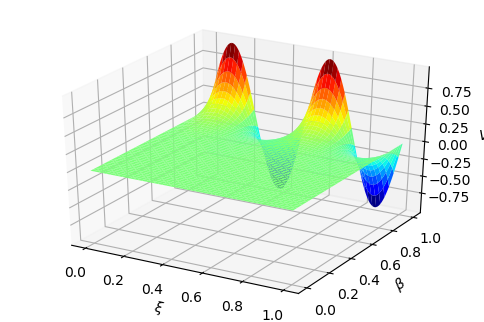

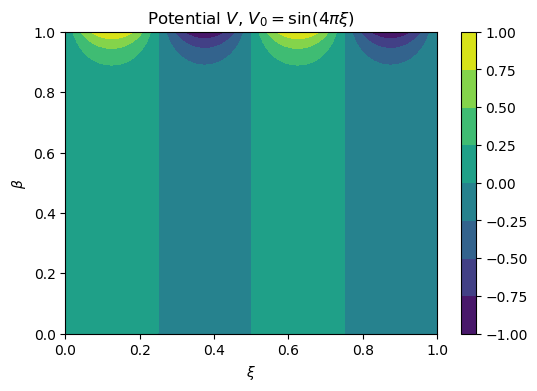

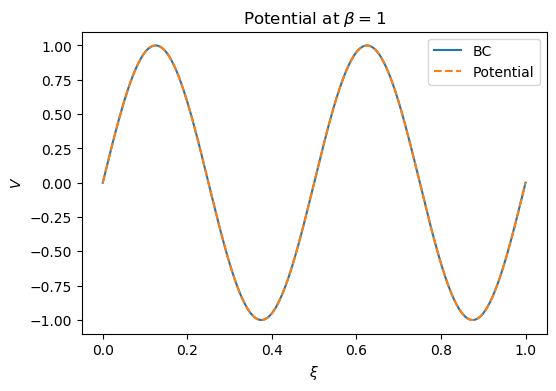

In [10]:
def V_o(x): # First test boundary potential
    return np.sin(4*np.pi*x)

Vso,ylo = V(xv,yv,V_o,100)

fig1 = plt.figure(dpi=100)
ax1 = plt.axes(projection='3d')
ax1.plot_surface(xv, yv, Vso, cmap='jet')
ax1.set_xlabel(r"$\xi$")
ax1.set_ylabel(r"$\beta$")
ax1.set_zlabel(r"$V$")
plt.savefig("V0_3D.pdf")
plt.show()

plt.figure(dpi=100)
plt.title(r"Potential $V$, $V_0 = \sin(4 \pi \xi)$")
plt.contourf(xv,yv,Vso)
plt.colorbar()
plt.xlabel(r"$\xi$")
plt.ylabel(r"$\beta$")
plt.savefig("V0_heat.pdf")
plt.show()

plt.figure(dpi=100)
plt.title(r"Potential at $\beta=1$")
plt.plot(x,V_o(x), label = "BC")
plt.plot(x,ylo,"--" ,label="Potential")
plt.xlabel(r"$\xi$")
plt.ylabel(r"$V$")
plt.legend()
plt.savefig("V0_BC.pdf")
plt.show()

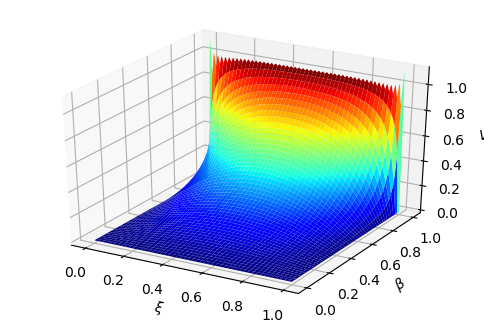

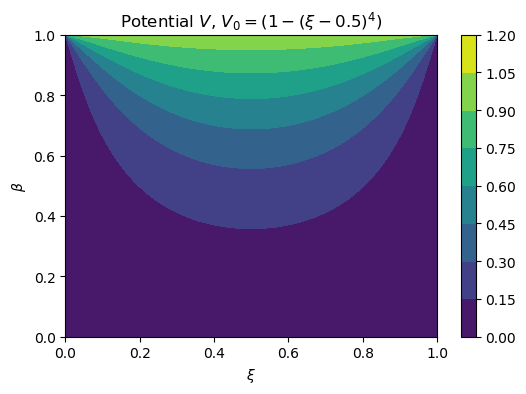

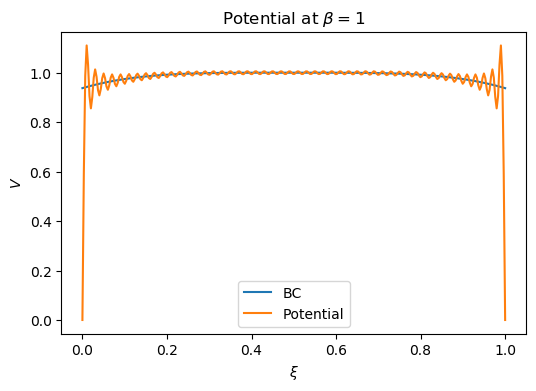

In [11]:
def V_1(x):
    return (1 - (x - 0.5)**4)

Vs1,yl1 = V(xv,yv,V_1,100)

fig1 = plt.figure(dpi=100)
ax1 = plt.axes(projection='3d')
ax1.plot_surface(xv, yv, Vs1, cmap='jet')
ax1.set_xlabel(r"$\xi$")
ax1.set_ylabel(r"$\beta$")
ax1.set_zlabel(r"$V$")
plt.savefig("V1_3D.pdf")
plt.show()

plt.figure(dpi=100)
plt.title(r"Potential $V$, $V_0 = (1 - (\xi - 0.5)^4)$")
plt.contourf(xv,yv,Vs1)
plt.colorbar()
plt.xlabel(r"$\xi$")
plt.ylabel(r"$\beta$")
plt.savefig("V1_heat.pdf")
plt.show()

plt.figure(dpi=100)
plt.title(r"Potential at $\beta=1$")
plt.plot(x,V_1(x), label = "BC")
plt.plot(x,yl1,label="Potential")
plt.xlabel(r"$\xi$")
plt.ylabel(r"$V$")
plt.legend()
plt.savefig("V1_BC.pdf")
plt.show()

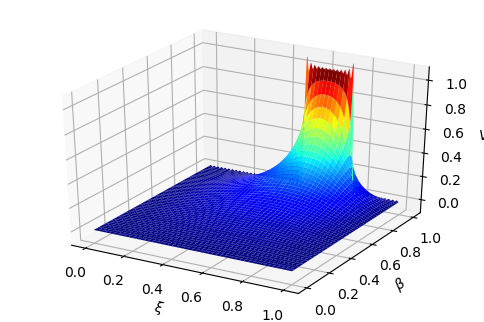

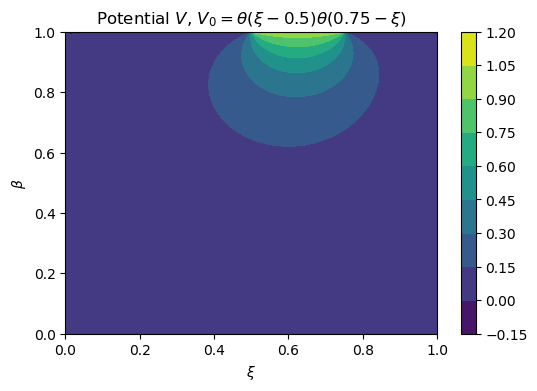

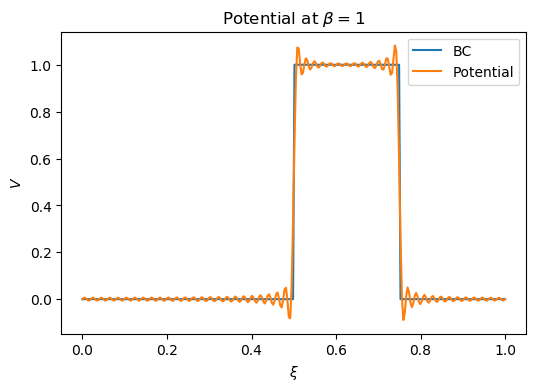

In [12]:
def V_2(x):
    return np.heaviside(x - 0.5 , 0.5) * np.heaviside(0.75 - x , 0.5)

Vs2,yl2 = V(xv,yv,V_2,100)

fig1 = plt.figure(dpi=100)
ax1 = plt.axes(projection='3d')
ax1.plot_surface(xv, yv, Vs2, cmap='jet')
ax1.set_xlabel(r"$\xi$")
ax1.set_ylabel(r"$\beta$")
ax1.set_zlabel(r"$V$")
plt.savefig("V2_3D.pdf")
plt.show()

plt.figure(dpi=100)
plt.title(r"Potential $V$, $V_0 = \theta(\xi - 0.5)\theta(0.75-\xi)$")
plt.contourf(xv,yv,Vs2)
plt.colorbar()
plt.xlabel(r"$\xi$")
plt.ylabel(r"$\beta$")
plt.savefig("V2_heat.pdf")
plt.show()

plt.figure(dpi=100)
plt.title(r"Potential at $\beta=1$")
plt.plot(x,V_2(x), label = "BC")
plt.plot(x,yl2,label="Potential")
plt.xlabel(r"$\xi$")
plt.ylabel(r"$V$")
plt.legend()
plt.savefig("V2_BC.pdf")
plt.show()

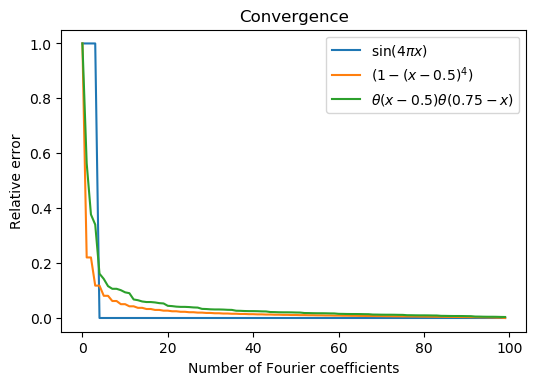

In [13]:
def conv(V0,V1,V2,n): # Calculates relative error as a function of the number of Fourier coefficients
    
    con = np.zeros((3,n))
    Vcount = 0
    
    for Vr in (V0,V1,V2): # For all 3 test boundary potentials
        con[Vcount,0] = 1
        Vex = V(xv,yv,Vr,n)[0] 
        error_ex = np.linalg.norm(Vex)
        for i in range(1,n):
            vt = V(xv,yv,Vr,i)[0]
            err = Vex - vt
            con[Vcount,i] = np.linalg.norm(err) / error_ex
        Vcount += 1
        
    return con

convergence = conv(V_o,V_1,V_2,100)

plt.figure(dpi=100)
plt.title("Convergence")
plt.plot(np.arange(0,100,1) , convergence[0,:],label = r"$\sin(4\pi x)$")
plt.plot(np.arange(0,100,1) , convergence[1,:],label = r"$(1 - (x-0.5)^4)$")
plt.plot(np.arange(0,100,1) , convergence[2,:],label = r"$\theta(x-0.5)\theta(0.75-x)$")
plt.xlabel("Number of Fourier coefficients")
plt.ylabel("Relative error")
plt.legend()
plt.savefig("Convergence.pdf")
plt.show()

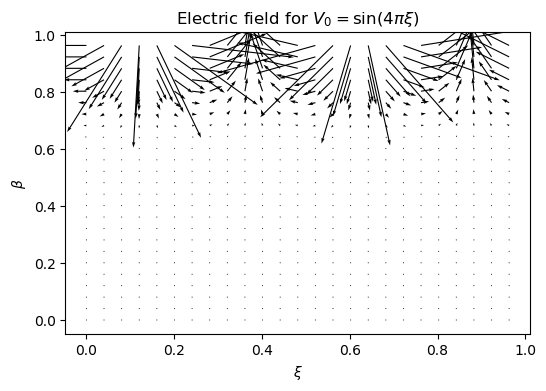

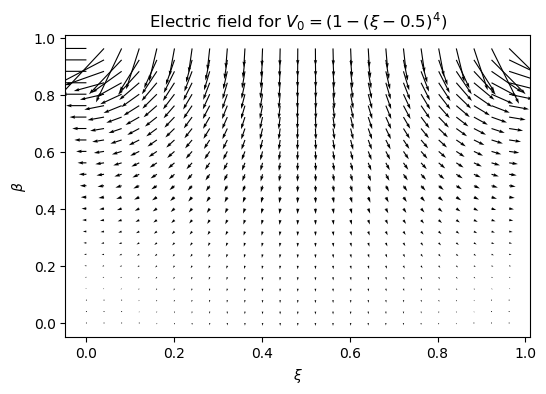

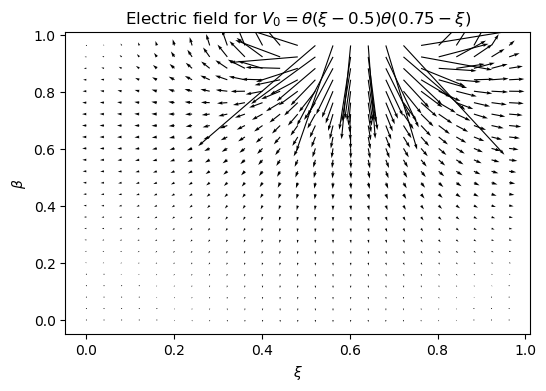

In [14]:
def E(V0,n): # Calculates E-field
    potet = V(xv,yv,V0,n)[0]
    Efield = np.gradient(potet) # Negative E-field, plots with minus sign later for correct E-field
    return Efield

Ee0 = E(V_o,100)

b = int(N/25)

plt.figure(dpi=100)
plt.title(r"Electric field for $V_0 = \sin(4 \pi \xi)$")
plt.quiver(xv[::b,::b],yv[::b,::b],-Ee0[1][::b,::b],-Ee0[0][::b,::b])
plt.xlabel(r"$\xi$")
plt.ylabel(r"$\beta$")
plt.savefig("E_V0.pdf")
plt.show()

Ee1 = E(V_1,100)

plt.figure(dpi=100)
plt.title(r"Electric field for $V_0 = (1 - (\xi - 0.5)^4)$")
plt.quiver(xv[::b,::b],yv[::b,::b],-Ee1[1][::b,::b],-Ee1[0][::b,::b])
plt.xlabel(r"$\xi$")
plt.ylabel(r"$\beta$")
plt.savefig("E_V1.pdf")
plt.show()

Ee2 = E(V_2,100)

plt.figure(dpi=100)
plt.title(r"Electric field for $V_0 = \theta(\xi - 0.5)\theta(0.75-\xi)$")
plt.quiver(xv[::b,::b],yv[::b,::b],-Ee2[1][::b,::b],-Ee2[0][::b,::b])
plt.xlabel(r"$\xi$")
plt.ylabel(r"$\beta$")
plt.savefig("E_V2.pdf")
plt.show()